In [1]:

# call __init_ to set notebook seed
import set_notebook_env
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

import set_notebook_env
loader, plot_utils = set_notebook_env.set_env(
    data_dir="../data/", 
    min_ratings=0, 
    max_ratings=None,
    drop_inconsistent_gender = True
)


Using seed: 18787288


In [2]:
loader.initial_setup()


In [3]:
print(loader)
print(loader.cleaning_info)


        Capstone Data Loader
            - data source ../data
            - seed_value 18787288
            - min_ratings 0
            - max_rating None
            - drop_missing_ratings True
            - drop_inconsistent_gender True
        
{'dropped_low_rating_count': 19889, 'dropped_missing_ratings': 0, 'dropped_inconsistent_gender': 17915}


In [4]:
df = loader.cleaned_df
df.columns

Index(['avg_rating', 'avg_difficulty', 'num_ratings', 'pepper',
       'would_take_again_prop', 'num_online_ratings', 'male', 'female',
       'tough_grader', 'good_feedback', 'respected', 'lots_to_read',
       'participation_matters', 'no_skip', 'lots_of_hw', 'inspirational',
       'pop_quizzes', 'accessible', 'papers', 'clear_grading', 'hilarious',
       'test_heavy', 'few_things', 'amazing_lectures', 'caring',
       'extra_credit', 'group_projects', 'lecture_heavy', 'major',
       'university', 'state'],
      dtype='object')

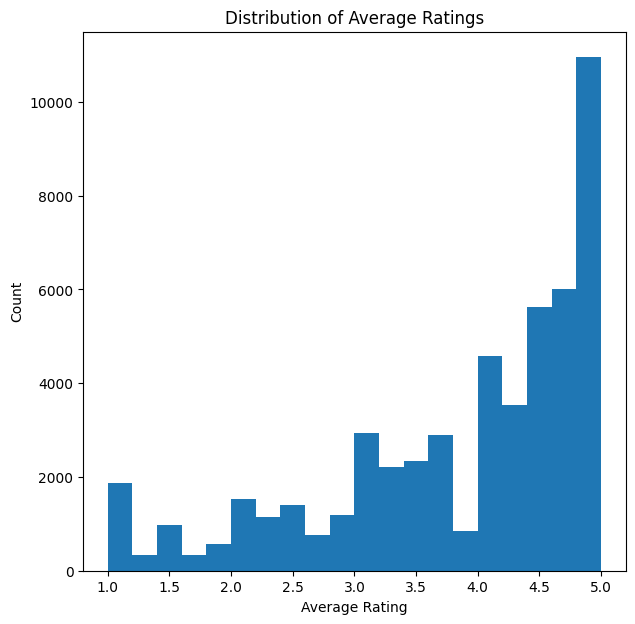

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(df["avg_rating"], bins=20)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Count")
ax.set_title("Distribution of Average Ratings")

plt.show()

In [11]:
# female
female = df.loc[df["female"] == 1]

# male
male = df.loc[df["male"] == 1]

# both (inconsistent labels)
both = df.loc[(df["male"] == 1) & (df["female"] == 1)]

none = df.loc[(df["male"] == 0) & (df["female"] == 0)]


n = df.shape[0]

print(
    "=" * 40,
    f"""
    female shape   = {female.shape}
    male shape     = {male.shape}
    both shape     = {both.shape}
    none shape     = {none.shape}
    original shape = {df.shape}

    % female = {female.shape[0] / n:.2%}
    % male   = {male.shape[0] / n:.2%}
    """
)

    female shape   = (24925, 31)
    male shape     = (27163, 31)
    both shape     = (0, 31)
    none shape     = (0, 31)
    original shape = (52088, 31)

    % female = 47.85%
    % male   = 52.15%
    


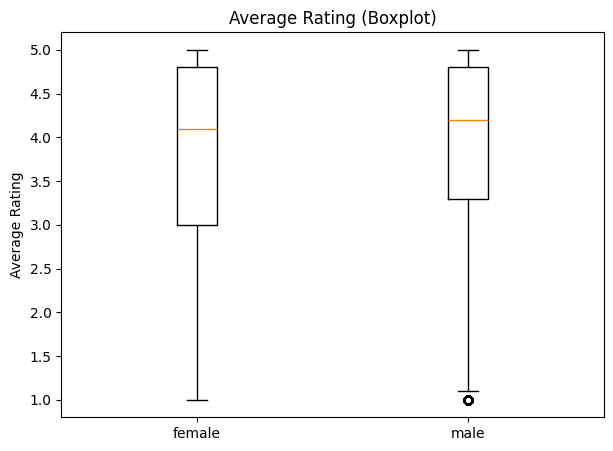

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

data = [
    female["avg_rating"].dropna().to_numpy(),
    male["avg_rating"].dropna().to_numpy()
]

ax.boxplot(data, labels=["female", "male"])
ax.set_title("Average Rating (Boxplot)")
ax.set_ylabel("Average Rating")

plt.show()